In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df_LA = pd.read_csv(r"E:\wenqu\DOE_Arctic_project\2023_updated\grouped_la.csv")
df_SLA = pd.read_csv(r"E:\wenqu\DOE_Arctic_project\2023_updated\grouped_sla.csv")
df_LDMC = pd.read_csv(r"E:\wenqu\DOE_Arctic_project\2023_updated\grouped_ldmc.csv")

df_new = pd.read_csv(r"E:\wenqu\DOE_Arctic_project\2023_updated\grouped_newtraits.csv")
df_pc = pd.read_csv(r"E:\wenqu\DOE_Arctic_project\2023_updated\grouped_pc.csv")

In [6]:
b_name_mean = []
b_name_std = []
for i in range(1, 123):
    b_mean = 'b' + str(i) + '_mean'
    b_name_mean.append(b_mean)
    b_std = 'b' + str(i) + '_std'
    b_name_std.append(b_std)
band_name = b_name_mean + b_name_std
band_name = np.array(band_name)

In [7]:
df_new

,site_quadrat,summed_sla_cover,la_cover,LDMC_cover,weighted_pc,weighted_d13c,weighted_pn,weighted_d15n,b1_mean,b2_mean,...,b113_std,b114_std,b115_std,b116_std,b117_std,b118_std,b119_std,b120_std,b121_std,b122_std
0,S1B_1,142.017256,16.964266,0.399141,43.312469,-28.492351,1.599822,-2.674121,0.008066,0.020107,...,0.043727,0.039954,0.037774,0.036505,0.031699,0.034067,0.029817,0.037205,0.029428,0.042243
1,S1B_10,137.317848,19.273836,0.378223,39.021692,-28.543685,1.793593,1.831298,0.009731,0.021409,...,0.198313,0.074142,0.189852,0.078799,0.192470,0.080803,0.186395,0.084301,0.161744,0.079994
2,S1B_12,108.293186,12.971441,0.454268,49.725402,-27.295808,1.669954,-1.259432,0.015963,0.030240,...,0.348449,0.138326,0.329519,0.134143,0.340357,0.137214,0.337107,0.149233,0.307343,0.140250
3,S1B_15,123.388481,21.105415,0.394001,44.428647,-28.973192,1.026573,-1.056765,0.017786,0.032077,...,0.296591,0.087097,0.275578,0.088697,0.290174,0.092787,0.285764,0.097216,0.256345,0.101517
4,S1B_2,118.391528,24.763514,0.354407,44.926538,-28.681537,1.932214,-4.042904,0.007073,0.017995,...,0.076173,0.067074,0.066786,0.066255,0.066698,0.067615,0.061808,0.064345,0.063712,0.071650
5,S1B_20,94.135562,11.366000,0.445734,48.516694,-27.204024,1.481015,-1.730092,0.010889,0.020691,...,0.225069,0.092107,0.218147,0.086991,0.206561,0.086440,0.209682,0.102773,0.181247,0.093985
6,S1B_21,109.088039,8.027806,0.459154,47.676539,-28.966740,1.249016,-2.647368,0.009929,0.017353,...,0.133839,0.081525,0.122919,0.077663,0.125216,0.083903,0.129472,0.092927,0.114103,0.086872
7,S1B_22,94.580416,13.014333,0.405659,47.424929,-27.382402,1.575523,1.363522,0.008476,0.018636,...,0.190251,0.064974,0.178361,0.063290,0.171402,0.064732,0.175261,0.068934,0.181233,0.090873
8,S1B_23,89.053207,4.119655,0.445457,46.925521,-27.159258,1.430021,-1.414530,0.019044,0.030510,...,0.215321,0.079997,0.200189,0.077250,0.193078,0.075351,0.196568,0.077396,0.205232,0.106467
9,S1B_24,103.707786,56.208788,0.401110,47.851934,-27.271762,2.100739,-0.782026,0.015023,0.025020,...,0.278203,0.104499,0.265356,0.102955,0.261363,0.105431,0.263606,0.102916,0.287034,0.127808


In [8]:
y_weighted_sla = df_SLA['weighted_sla'].to_numpy()
y_weighted_la = df_LA['weighted_la'].to_numpy()
y_weighted_LDMC = df_LDMC['weighted_LDMC'].to_numpy()

# vol_mois_sla = np.array(df_SLA['vol_moisture'])
# vol_mois_la = np.array(df_LA['vol_moisture'])
# vol_mois_LDMC = np.array(df_LDMC['vol_moisture'])


x_sla = np.array(df_SLA[band_name])
x_la = np.array(df_LA[band_name])
x_ldmc = np.array(df_LDMC[band_name])




KeyError: 'weighted_sla'

In [6]:
y_weighted_pc = df_pc['weighted_pc'].to_numpy()
y_weighted_d13c = df_new['weighted_d13c'].to_numpy()
y_weighted_pn = df_new['weighted_pn'].to_numpy()
y_weighted_d15n = df_new['weighted_d15n'].to_numpy()

x_pc = np.array(df_pc[band_name])
x_new_traits = np.array(df_new[band_name])

In [7]:
labels_sla = [] 
for i in range(len(df_SLA['site'])):
    
    site_name = df_SLA['site'][i].split("_")[0]

    labels_sla.append(site_name)
    

In [8]:
labels_la = [] 
for i in range(len(df_LA['site'])):    
    site_name = df_LA['site'][i].split("_")[0]
    labels_la.append(site_name)

In [9]:
labels_ldmc = [] 
for i in range(len(df_LDMC['site'])):    
    site_name = df_LDMC['site'][i].split("_")[0]
    labels_ldmc.append(site_name)

In [10]:
labels_pc = [] 
for i in range(len(df_pc['site'])):
    
    site_name = df_pc['site'][i].split("_")[0]

    labels_pc.append(site_name)

In [11]:
labels_d13c = [] 
for i in range(len(df_new['site'])):
    
    site_name = df_new['site'][i].split("_")[0]

    labels_d13c.append(site_name)

In [12]:
labels_pn = [] 
for i in range(len(df_new['site'])):
    
    site_name = df_new['site'][i].split("_")[0]

    labels_pn.append(site_name)

In [13]:
labels_d15n = [] 
for i in range(len(df_new['site'])):
    
    site_name = df_new['site'][i].split("_")[0]

    labels_d15n.append(site_name)

In [14]:
print(len(labels_sla), len(labels_la), len(labels_ldmc), len(labels_pc), len(labels_d15n))

63 64 61 63 65


In [15]:
log_y_weighted_sla = np.log(y_weighted_sla)
log_y_weighted_la = np.log(y_weighted_la)
log_y_weighted_LDMC = np.log(y_weighted_LDMC)

In [16]:
log_y_weighted_pc = np.log(y_weighted_pc)
log_y_weighted_d13c = np.log(y_weighted_d13c)
log_y_weighted_pn = np.log(y_weighted_pn)
log_y_weighted_d15n = np.log(y_weighted_d15n)

C:\Users\15086\AppData\Local\Temp\ipykernel_22700\2364378705.py:2: RuntimeWarning: invalid value encountered in log
  log_y_weighted_d13c = np.log(y_weighted_d13c)
C:\Users\15086\AppData\Local\Temp\ipykernel_22700\2364378705.py:4: RuntimeWarning: invalid value encountered in log
  log_y_weighted_d15n = np.log(y_weighted_d15n)


In [22]:
y_weighted_pc

array([43.31246864, 39.0216923 , 49.7254015 , 46.14547363, 44.42864699,
       45.35987159, 44.92653785, 48.51669384, 47.67653853, 47.42492852,
       46.92552143, 47.85193438, 46.11798156, 46.77254171, 46.42601833,
       46.19676128, 44.43411362, 45.64992568, 48.58916759, 40.45349224,
       44.63180763, 45.49917166, 45.58493973, 48.00132616, 46.41487276,
       46.08297701, 44.71595736, 47.87348466, 42.81589374, 46.26827349,
       44.29362841, 45.61779442, 45.87695141, 49.4742842 , 42.88777701,
       45.257198  , 42.13224794, 47.53916195, 47.00787416, 48.08598171,
       45.08103007, 46.4027152 , 48.54669978, 47.19151927, 42.79340743,
       45.97798529, 42.47573482, 44.88948688, 44.73580166, 39.86631847,
       46.23854637, 46.20293336, 46.14930799, 47.25336739, 48.53512027,
       45.31942974, 45.54658078, 42.73647841, 42.7299094 , 43.40000072,
       44.54039147, 46.42459892, 44.02214463])

In [17]:
def pls_variable_selection(X, y, max_comp):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
 
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
 
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
 
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
 
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
 
            mse[i,j] = np.sqrt(mean_squared_error(y, y_cv))
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
 
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be keeped ",(X.shape[1]-mseminy[0]))
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
#     plt.imshow(mse, interpolation=None)
#     plt.show()
 
 
    # Calculate PLS with optimal components and export values
    optimal_pls  = PLSRegression(n_components=mseminx[0]+1)
    optimal_pls .fit(X, y)
#     important_coefficients = optimal_pls.coef_
        
    sorted_ind = np.argsort(np.abs(optimal_pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_predict
import csv

def simple_pls_cv(X, y, n_comp, labels, filename):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
    print(y_c)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)


    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean square error for calibration and cross validation
#     mse_c = mean_squared_error(y, y_c)
#     mse_cv = mean_squared_error(y, y_cv)
    rmse_c = mean_squared_error(y, y_c, squared=False)
    rmse_cv = mean_squared_error(y, y_cv, squared=False)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
#     print('MSE calib: %5.3f' % mse_c)
#     print('MSE CV: %5.3f' % mse_cv)
    print('RMSE calib: %5.3f' % rmse_c)
    print('RMSE CV: %5.3f' % rmse_cv)

    # Plot regression 
    z = np.polyfit(y, y_cv, 1)
    print(z[1],z[0])
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'red'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'P', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'}
        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i], y_c[i])
                csvwriter.writerow([i, label, y_cv[i], y[i]])
            
            
        for i, label in enumerate(labels):
            
            
            scatter_obj = ax.scatter(y_cv[i], y[i], marker=label_dict.get(label, label_dict['site6'])['marker'],
                                     c=label_dict.get(label, label_dict['site6'])['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)

        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()


# sla - b123mean

In [20]:
opt_Xc_SLA, ncomp_SLA, wav_SLA, sorted_ind_SLA= pls_variable_selection(x_sla, log_y_weighted_sla, 20)

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


35% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


75% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  15
Wavelengths to be keeped  42
Optimised MSEP  0.2056605829179507



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


[[4.60996369]
 [4.44354241]
 [4.61903032]
 [4.28563429]
 [3.54562488]
 [4.46706841]
 [4.64749556]
 [4.53519891]
 [3.6258763 ]
 [4.22958678]
 [4.67974875]
 [4.64534603]
 [4.28885233]
 [3.78167044]
 [3.87828612]
 [4.55922227]
 [4.60310195]
 [3.92719588]
 [4.45577312]
 [4.81300923]
 [4.76422462]
 [4.29487205]
 [4.2709679 ]
 [4.23678493]
 [4.62454379]
 [4.91367268]
 [4.90699471]
 [4.92881608]
 [4.67180311]
 [4.76871774]
 [4.82080831]
 [4.90960912]
 [4.7032165 ]
 [4.68844622]
 [4.79440155]
 [4.44336497]
 [4.51546206]
 [4.5042352 ]
 [4.60460638]
 [4.8969805 ]
 [4.7932808 ]
 [4.65281882]
 [4.89349027]
 [4.67331069]
 [4.77617586]
 [4.70337585]
 [5.01058611]
 [4.87659884]
 [4.66988583]
 [4.72249013]
 [4.04394876]
 [4.01494375]
 [4.34287215]
 [3.9075326 ]
 [4.26081812]
 [4.59147928]
 [4.25107776]
 [4.68356459]
 [4.49549415]
 [4.65053691]
 [4.45472136]
 [4.37374462]
 [4.39150648]]
R2 calib: 0.923
R2 CV: 0.508
RMSE calib: 0.094
RMSE CV: 0.238
[1.64449867] [0.63725071]
0 site2a [4.46140425] 4.63739

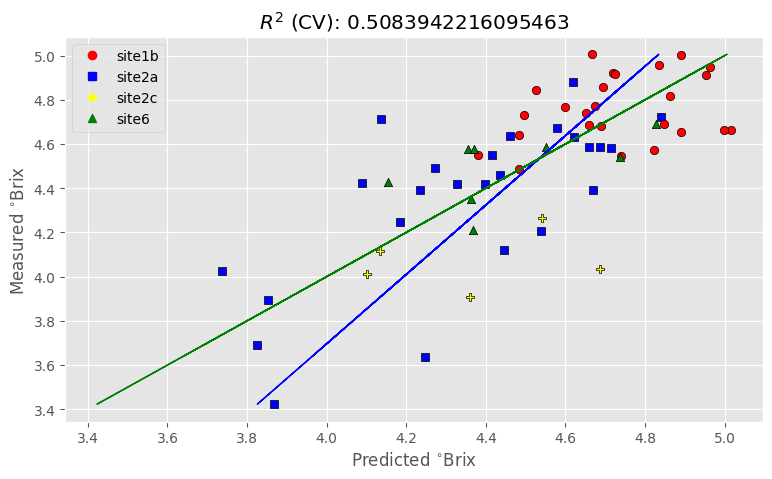

In [21]:
file_name_sla = 'F:/wenqu/result/sla.csv'
simple_pls_cv(opt_Xc_SLA, log_y_weighted_sla, ncomp_SLA, labels_sla,file_name_sla)

In [21]:
# Manually calculate the mean and standard deviation
mean = np.mean(opt_Xc_SLA, axis=0)
std_dev = np.std(opt_Xc_SLA, axis=0)

# Manually scale the data
opt_Xc_SLA_scaled = (opt_Xc_SLA - mean) / std_dev

In [22]:

optimal_pls_sla  = PLSRegression(n_components=15, scale=False)
optimal_pls_sla.fit(opt_Xc_SLA_scaled, log_y_weighted_sla)

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_SLA][wav_SLA:]

print(coefficients_sla.shape, bands_sla.shape)



(42,) (42,)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [26]:
coefficients_sla

array([ 0.23562417,  0.66330795,  0.39986637, -0.01687954,  0.50030269,
        0.45269614,  0.04948647, -0.53918791,  0.57004626, -0.62401186,
        0.23802469,  0.1267878 ,  0.2784531 , -0.0968119 ,  0.51518132,
       -0.09756445,  0.74591065,  0.55759186, -0.2407478 , -0.01391583,
        0.78944988, -0.856621  , -0.14698183,  0.29934839,  0.47272174,
        0.07216129, -0.59021684, -0.24704267, -0.0826154 ,  0.33253932,
        0.70286934,  0.28681816, -0.35395131, -0.4676628 , -0.09863358,
       -0.521584  , -0.89970039, -0.68983843,  0.22234331, -0.32022181,
       -0.73574753, -0.86262404])

In [24]:
bands_sla

array(['b18_std', 'b96_std', 'b90_mean', 'b117_std', 'b13_std', 'b46_std',
       'b14_std', 'b102_std', 'b117_mean', 'b41_std', 'b6_mean', 'b5_std',
       'b29_std', 'b1_mean', 'b48_std', 'b119_std', 'b91_std', 'b97_std',
       'b86_std', 'b59_mean', 'b16_std', 'b121_mean', 'b112_mean',
       'b52_std', 'b108_std', 'b60_mean', 'b59_std', 'b17_std',
       'b113_std', 'b7_mean', 'b116_std', 'b9_std', 'b7_std', 'b98_std',
       'b8_std', 'b8_mean', 'b103_std', 'b25_std', 'b2_mean', 'b3_mean',
       'b107_std', 'b12_std'], dtype='<U9')

In [27]:
# Compute the intercept using means of X and y
x_mean = opt_Xc_SLA_scaled.mean(axis=0)
y_mean = log_y_weighted_sla.mean()

intercept_sla = y_mean - np.dot(x_mean, coefficients_sla)

linear_equation = "sla_trait = "

for coef, predictor in zip(coefficients_sla, bands_sla):
    linear_equation += "{:.6f}*data_dict['{}'] + ".format(coef, predictor)

# Adding the intercept to the end
linear_equation += "{:.6f}".format(intercept_sla)

print(linear_equation)

sla_trait = 0.235624*data_dict['b18_std'] + 0.663308*data_dict['b96_std'] + 0.399866*data_dict['b90_mean'] + -0.016880*data_dict['b117_std'] + 0.500303*data_dict['b13_std'] + 0.452696*data_dict['b46_std'] + 0.049486*data_dict['b14_std'] + -0.539188*data_dict['b102_std'] + 0.570046*data_dict['b117_mean'] + -0.624012*data_dict['b41_std'] + 0.238025*data_dict['b6_mean'] + 0.126788*data_dict['b5_std'] + 0.278453*data_dict['b29_std'] + -0.096812*data_dict['b1_mean'] + 0.515181*data_dict['b48_std'] + -0.097564*data_dict['b119_std'] + 0.745911*data_dict['b91_std'] + 0.557592*data_dict['b97_std'] + -0.240748*data_dict['b86_std'] + -0.013916*data_dict['b59_mean'] + 0.789450*data_dict['b16_std'] + -0.856621*data_dict['b121_mean'] + -0.146982*data_dict['b112_mean'] + 0.299348*data_dict['b52_std'] + 0.472722*data_dict['b108_std'] + 0.072161*data_dict['b60_mean'] + -0.590217*data_dict['b59_std'] + -0.247043*data_dict['b17_std'] + -0.082615*data_dict['b113_std'] + 0.332539*data_dict['b7_mean'] + 0.7

In [28]:
intercept_sla

4.51012713983741

# pc

In [29]:
opt_Xc_pc, ncomp_pc, wav_pc, sorted_ind_pc = pls_variable_selection(x_pc, log_y_weighted_pc, 30)

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


3% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  26
Wavelengths to be keeped  76
Optimised MSEP  0.04089806343848275



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


[[3.76694175]
 [3.6684804 ]
 [3.91002034]
 [3.8260565 ]
 [3.79290998]
 [3.81225732]
 [3.80292274]
 [3.87730383]
 [3.86525919]
 [3.86092876]
 [3.85227653]
 [3.86377504]
 [3.82744619]
 [3.84659936]
 [3.84020203]
 [3.82865594]
 [3.79496548]
 [3.82531068]
 [3.88239751]
 [3.69955651]
 [3.79865667]
 [3.81763935]
 [3.81846733]
 [3.87920174]
 [3.84269197]
 [3.82793435]
 [3.80483984]
 [3.87049857]
 [3.75865482]
 [3.82780693]
 [3.79644144]
 [3.81558451]
 [3.83227922]
 [3.8995633 ]
 [3.75746649]
 [3.81070673]
 [3.73837852]
 [3.86135404]
 [3.85296231]
 [3.87292307]
 [3.8107468 ]
 [3.83366793]
 [3.8828464 ]
 [3.8534015 ]
 [3.75335529]
 [3.82679973]
 [3.74524986]
 [3.80184897]
 [3.80978358]
 [3.68848619]
 [3.82802379]
 [3.83556674]
 [3.82723074]
 [3.85554244]
 [3.88036626]
 [3.81959896]
 [3.81951927]
 [3.75539532]
 [3.75832842]
 [3.7679045 ]
 [3.79560884]
 [3.83796854]
 [3.78220356]]
R2 calib: 0.995
R2 CV: 0.574
RMSE calib: 0.003
RMSE CV: 0.032
[1.42477749] [0.62711081]
0 site1b [3.73025928] 3.76844

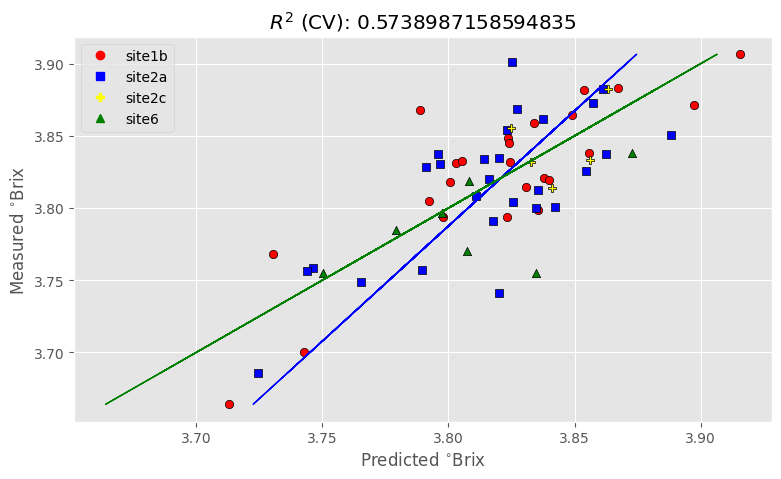

In [30]:
file_name_pc = 'F:/wenqu/result/pc1.csv'
simple_pls_cv(opt_Xc_pc, log_y_weighted_pc, ncomp_pc, labels_pc,file_name_pc)

In [31]:
# Manually calculate the mean and standard deviation
mean = np.mean(opt_Xc_pc, axis=0)
std_dev = np.std(opt_Xc_pc, axis=0)

# Manually scale the data
opt_Xc_pc_scaled = (opt_Xc_pc - mean) / std_dev

In [32]:
optimal_pls_pc  = PLSRegression(n_components=26, scale=False)
optimal_pls_pc.fit(opt_Xc_pc_scaled, log_y_weighted_pc)

coefficients_pc = optimal_pls_pc.coef_[:,0]
bands = band_name[sorted_ind_pc][wav_pc:]

print(coefficients_pc.shape, bands.shape)

(76,) (76,)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [33]:
# Compute the intercept using means of X and y
x_mean = opt_Xc_pc_scaled.mean(axis=0)
y_mean = log_y_weighted_pc.mean()

intercept_pc = y_mean - np.dot(x_mean, coefficients_pc)

linear_equation = "pc_trait = "

for coef, predictor in zip(coefficients_pc, bands):
    linear_equation += "{:.6f}*data_dict['{}'] + ".format(coef, predictor)

# Adding the intercept to the end
linear_equation += "{:.6f}".format(intercept_pc)

print(linear_equation)

pc_trait = 0.088487*data_dict['b62_mean'] + 0.054783*data_dict['b57_mean'] + 0.052568*data_dict['b24_std'] + -0.047865*data_dict['b47_mean'] + 0.021504*data_dict['b52_std'] + -0.042530*data_dict['b71_std'] + -0.064668*data_dict['b117_mean'] + -0.058651*data_dict['b70_std'] + 0.049745*data_dict['b10_std'] + 0.032198*data_dict['b24_mean'] + 0.050583*data_dict['b84_std'] + 0.009100*data_dict['b22_mean'] + -0.012284*data_dict['b103_std'] + 0.031294*data_dict['b100_std'] + 0.044578*data_dict['b32_mean'] + -0.086692*data_dict['b91_std'] + -0.052204*data_dict['b8_std'] + -0.020906*data_dict['b51_mean'] + -0.036378*data_dict['b118_std'] + 0.002712*data_dict['b56_std'] + 0.004304*data_dict['b77_std'] + 0.035506*data_dict['b34_std'] + -0.017833*data_dict['b2_mean'] + -0.001226*data_dict['b19_mean'] + 0.009236*data_dict['b63_std'] + 0.107004*data_dict['b65_std'] + 0.058699*data_dict['b121_std'] + 0.037714*data_dict['b6_std'] + 0.082691*data_dict['b20_std'] + -0.005324*data_dict['b105_mean'] + 0.0

In [34]:
bands

array(['b62_mean', 'b57_mean', 'b24_std', 'b47_mean', 'b52_std',
       'b71_std', 'b117_mean', 'b70_std', 'b10_std', 'b24_mean',
       'b84_std', 'b22_mean', 'b103_std', 'b100_std', 'b32_mean',
       'b91_std', 'b8_std', 'b51_mean', 'b118_std', 'b56_std', 'b77_std',
       'b34_std', 'b2_mean', 'b19_mean', 'b63_std', 'b65_std', 'b121_std',
       'b6_std', 'b20_std', 'b105_mean', 'b16_std', 'b68_std', 'b94_std',
       'b47_std', 'b106_mean', 'b50_std', 'b116_mean', 'b16_mean',
       'b23_std', 'b104_mean', 'b14_mean', 'b27_std', 'b122_std',
       'b113_std', 'b8_mean', 'b103_mean', 'b18_std', 'b46_mean',
       'b51_std', 'b6_mean', 'b48_mean', 'b85_std', 'b11_std', 'b32_std',
       'b97_std', 'b37_std', 'b110_mean', 'b20_mean', 'b98_std',
       'b46_std', 'b122_mean', 'b39_std', 'b5_mean', 'b10_mean',
       'b108_std', 'b113_mean', 'b111_std', 'b114_mean', 'b86_std',
       'b31_std', 'b15_std', 'b42_std', 'b119_std', 'b9_std', 'b107_std',
       'b117_std'], dtype='<U9')

In [35]:
coefficients_pc

array([ 0.08848677,  0.05478317,  0.05256774, -0.04786549,  0.02150385,
       -0.04252965, -0.06466783, -0.05865075,  0.04974475,  0.03219795,
        0.05058323,  0.00910014, -0.01228434,  0.03129409,  0.04457779,
       -0.08669225, -0.05220413, -0.0209057 , -0.03637776,  0.00271202,
        0.0043043 ,  0.03550629, -0.01783343, -0.00122641,  0.00923574,
        0.10700356,  0.05869851,  0.03771443,  0.08269072, -0.00532374,
        0.0632446 , -0.06969654, -0.03877824, -0.03280895, -0.05933866,
        0.01946385,  0.05031508, -0.02838411,  0.0337737 , -0.05485152,
        0.02381483,  0.02667753, -0.0707452 ,  0.08682392, -0.0891097 ,
       -0.08298777, -0.0844774 , -0.1039567 ,  0.01176349,  0.06664322,
       -0.03689816,  0.13839298, -0.05053166, -0.05089865, -0.05732826,
        0.07505291, -0.05679779,  0.14454657, -0.06842808, -0.0753032 ,
        0.04366834,  0.05968771,  0.02052663, -0.07069949,  0.07237459,
        0.04164808,  0.03869353,  0.13878821,  0.08428193, -0.10

In [36]:
intercept_pc

3.8174247759422837

# d13c

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


2% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


11% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


17% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


31% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


37% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


51% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


57% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


71% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


77% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


91% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


97% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  30
Wavelengths to be keeped  83
Optimised MSEP  0.4993142287654704

[[-28.37137273]
 [-28.58101981]
 [-26.56207191]
 [-27.28563591]
 [-27.79680427]
 [-28.95159757]
 [-25.70200097]
 [-28.69093755]
 [-27.15743269]
 [-28.99031552]
 [-27.33823081]
 [-27.1551868 ]
 [-27.28671458]
 [-28.75777828]
 [-28.42498029]
 [-26.74897502]
 [-27.23281547]
 [-28.66162232]
 [-27.46285209]
 [-27.78761695]
 [-28.92583318]
 [-28.19978536]
 [-27.31350766]
 [-27.67007906]
 [-27.35005765]
 [-30.17799916]
 [-29.38767298]
 [-29.40481311]
 [-29.99484684]
 [-28.97177104]
 [-28.8612915 ]
 [-30.24160347]
 [-27.12209089]
 [-29.22545164]
 [-27.97938134]
 [-28.34964808]
 [-29.68159288]
 [-29.55115397]
 [-27.3002636 ]
 [-29.46604035]
 [-29.23148184]
 [-28.24897476]
 [-29.26736461]
 [-28.66442859]
 [-27.81243041]
 [-30.15356113]
 [-28.98356731]
 [-29.48902166]
 [-29.40394292]
 [-29.70092303]
 [-28.11093636]
 [-30.23899492]
 [-27.98394645]
 [-26.71670116]
 [-27.57918409]


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


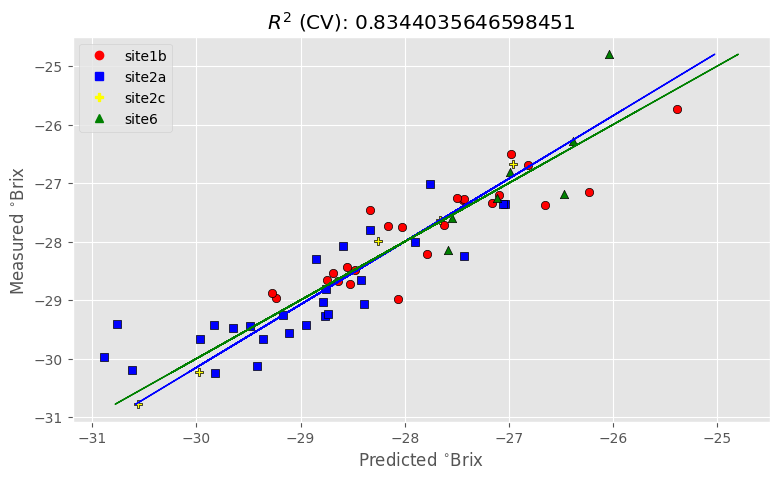

In [37]:
opt_Xc_d13c, ncomp_d13c, wav_d13c, sorted_ind_d13c = pls_variable_selection(x_new_traits, y_weighted_d13c, 35)
file_name = 'F:/wenqu/result/d13c.csv'
simple_pls_cv(opt_Xc_d13c, y_weighted_d13c, ncomp_d13c, labels_pc,file_name)

In [38]:
# Manually calculate the mean and standard deviation
mean = np.mean(opt_Xc_d13c, axis=0)
std_dev = np.std(opt_Xc_d13c, axis=0)

# Manually scale the data
opt_Xc_d13c_scaled = (opt_Xc_d13c - mean) / std_dev

In [39]:
optimal_pls_d13c  = PLSRegression(n_components=30, scale=False)
optimal_pls_d13c.fit(opt_Xc_d13c_scaled, y_weighted_d13c)

coefficients = optimal_pls_d13c.coef_[:,0]
bands = band_name[sorted_ind_d13c][wav_d13c:]

print(coefficients.shape, bands.shape)

(83,) (83,)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [40]:
# Compute the intercept using means of X and y
x_mean = opt_Xc_d13c_scaled.mean(axis=0)
y_mean = y_weighted_d13c.mean()

intercept_d13c = y_mean - np.dot(x_mean, coefficients)

linear_equation = "d13c_trait = "

for coef, predictor in zip(coefficients.flatten(), bands):
    linear_equation += "{:.6f}*data_dict['{}'] + ".format(coef, predictor)

# Adding the intercept to the end
linear_equation += "{:.6f}".format(intercept_d13c)

print(linear_equation)

d13c_trait = 1.146498*data_dict['b113_std'] + -0.174970*data_dict['b66_mean'] + -1.595730*data_dict['b87_mean'] + -0.453145*data_dict['b3_std'] + -1.003314*data_dict['b43_mean'] + 0.638330*data_dict['b70_mean'] + 0.221278*data_dict['b8_std'] + 1.020270*data_dict['b27_mean'] + 0.623705*data_dict['b10_std'] + 0.561377*data_dict['b57_mean'] + -0.216166*data_dict['b15_std'] + -1.061246*data_dict['b49_mean'] + -0.056627*data_dict['b96_std'] + -0.018613*data_dict['b114_mean'] + -0.993828*data_dict['b120_mean'] + 1.130208*data_dict['b47_std'] + 0.199089*data_dict['b35_std'] + 0.585941*data_dict['b5_mean'] + -0.063294*data_dict['b31_mean'] + -0.722730*data_dict['b14_mean'] + 1.339220*data_dict['b40_std'] + -0.189825*data_dict['b97_std'] + 0.776037*data_dict['b13_mean'] + 1.247587*data_dict['b30_mean'] + 1.223093*data_dict['b85_std'] + 0.411240*data_dict['b5_std'] + 0.144372*data_dict['b122_std'] + 1.495732*data_dict['b69_std'] + -0.258281*data_dict['b4_std'] + 0.020056*data_dict['b13_std'] + -

In [41]:
bands

array(['b113_std', 'b66_mean', 'b87_mean', 'b3_std', 'b43_mean',
       'b70_mean', 'b8_std', 'b27_mean', 'b10_std', 'b57_mean', 'b15_std',
       'b49_mean', 'b96_std', 'b114_mean', 'b120_mean', 'b47_std',
       'b35_std', 'b5_mean', 'b31_mean', 'b14_mean', 'b40_std', 'b97_std',
       'b13_mean', 'b30_mean', 'b85_std', 'b5_std', 'b122_std', 'b69_std',
       'b4_std', 'b13_std', 'b34_std', 'b69_mean', 'b42_std', 'b16_mean',
       'b67_mean', 'b7_std', 'b56_mean', 'b9_std', 'b41_mean', 'b108_std',
       'b99_mean', 'b53_std', 'b112_std', 'b59_std', 'b105_std',
       'b68_mean', 'b8_mean', 'b33_mean', 'b79_std', 'b4_mean',
       'b117_mean', 'b61_std', 'b99_std', 'b19_mean', 'b55_mean',
       'b115_std', 'b47_mean', 'b119_std', 'b93_std', 'b33_std',
       'b14_std', 'b50_mean', 'b89_std', 'b32_std', 'b107_std', 'b3_mean',
       'b54_mean', 'b29_std', 'b37_std', 'b45_std', 'b9_mean', 'b6_mean',
       'b1_mean', 'b118_std', 'b109_std', 'b121_std', 'b122_mean',
       'b26_std', 

In [42]:
coefficients

array([ 1.1464976 , -0.17496993, -1.59573048, -0.45314507, -1.00331354,
        0.63832984,  0.22127773,  1.02026984,  0.623705  ,  0.56137732,
       -0.21616578, -1.0612456 , -0.05662739, -0.01861309, -0.99382765,
        1.1302077 ,  0.19908862,  0.5859411 , -0.06329444, -0.72273013,
        1.33922029, -0.18982471,  0.77603748,  1.24758746,  1.223093  ,
        0.4112403 ,  0.14437214,  1.4957325 , -0.25828118,  0.0200556 ,
       -0.27664537,  0.98165342,  1.07025136, -0.13849252,  0.75244538,
       -0.58610297,  1.07570566,  0.80504168, -1.0873161 ,  0.5696146 ,
       -1.62809399,  0.24425199, -0.87318097, -0.81342633,  0.9502269 ,
        1.12928574,  0.40421515,  0.4540591 ,  1.27089281, -1.23528173,
       -0.59001976,  0.18818616, -1.1384059 ,  1.16525115,  0.85616512,
        0.98797864, -1.4243724 , -0.53334373, -0.99282983,  0.74287287,
        0.67817977, -1.37156274, -1.57990404, -1.60097013,  1.41806017,
       -0.60695874,  1.3270005 , -1.46770429, -0.74223443, -1.03

In [43]:
intercept_d13c

-28.25084372692308

# PN

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


2% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


7% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


21% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


31% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


39% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


47% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


57% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


71% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


81% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


89% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


97% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  37
Wavelengths to be keeped  84
Optimised MSEP  0.18235413384136795

[[ 0.46859951]
 [ 0.58113112]
 [ 0.20766768]
 [ 0.51261338]
 [ 0.40523619]
 [ 0.02122878]
 [ 0.43566759]
 [ 0.65688065]
 [ 0.39607113]
 [ 0.21747016]
 [ 0.4449857 ]
 [ 0.35958041]
 [ 0.74916254]
 [ 0.39711136]
 [ 0.26199908]
 [ 0.30721076]
 [ 0.25680461]
 [ 0.60848758]
 [ 0.57017661]
 [ 0.80584829]
 [ 0.39711929]
 [ 1.04471291]
 [ 0.82943552]
 [ 1.06667823]
 [ 0.74127674]
 [ 0.83346992]
 [ 0.49299954]
 [ 0.34160945]
 [ 0.43796311]
 [ 0.19076143]
 [-0.12534234]
 [ 0.01894421]
 [ 0.26083873]
 [ 0.26728129]
 [ 0.20534435]
 [-0.21167716]
 [ 0.93609263]
 [ 0.1239931 ]
 [ 0.39403305]
 [ 0.13769514]
 [ 0.54944516]
 [ 0.13692359]
 [ 0.11748397]
 [ 0.72284242]
 [ 0.47637446]
 [ 0.14517489]
 [ 0.83432275]
 [-0.22183149]
 [ 0.83694827]
 [ 0.17105397]
 [ 0.53780335]
 [ 0.60491903]
 [ 0.44313445]
 [ 0.36072945]
 [ 0.47944989]
 [ 0.63611941]
 [ 0.49631874]
 [ 0.6266098 ]
 [ 0.1505

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


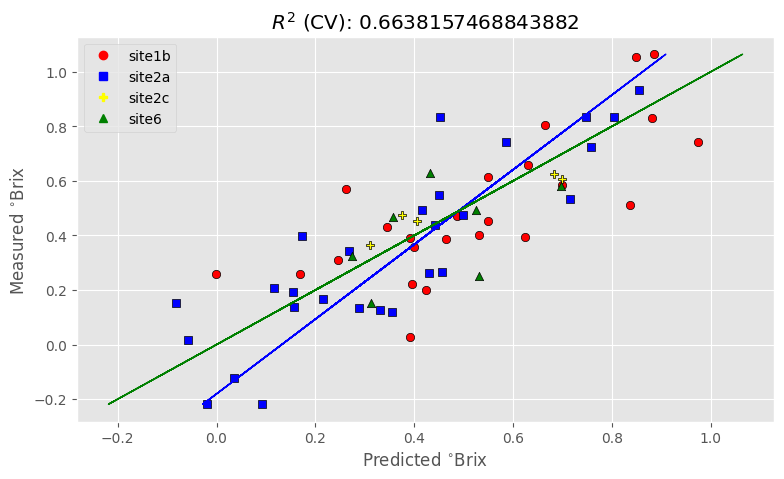

In [44]:
opt_Xc_PN, ncomp_PN, wav_PN, sorted_ind_PN = pls_variable_selection(x_new_traits, log_y_weighted_pn, 38)
file_name = 'F:/wenqu/result/pn.csv'
simple_pls_cv(opt_Xc_PN, log_y_weighted_pn, ncomp_PN, labels_pc, file_name)

In [45]:
mean = np.mean(opt_Xc_PN, axis=0)
std_dev = np.std(opt_Xc_PN, axis=0)

# Manually scale the data
opt_Xc_PN_scaled = (opt_Xc_PN - mean) / std_dev

In [46]:
optimal_pls_pn  = PLSRegression(n_components=37, scale=False)
optimal_pls_pn.fit(opt_Xc_PN_scaled, log_y_weighted_pn)

coefficients = optimal_pls_pn.coef_[:,0]
bands = band_name[sorted_ind_PN][wav_PN:]

print(coefficients.shape, bands.shape)

(84,) (84,)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [47]:
# Compute the intercept using means of X and y
x_mean = opt_Xc_PN_scaled.mean(axis=0)
y_mean = log_y_weighted_pn.mean()

intercept_pn = y_mean - np.dot(x_mean, coefficients)

linear_equation = "pn_trait = "

for coef, predictor in zip(coefficients.flatten(), bands):
    linear_equation += "{:.6f}*data_dict['{}'] + ".format(coef, predictor)

# Adding the intercept to the end
linear_equation += "{:.6f}".format(intercept_pn)

print(linear_equation)

pn_trait = -0.385934*data_dict['b107_std'] + 0.234846*data_dict['b102_std'] + -0.138927*data_dict['b66_mean'] + -0.060767*data_dict['b85_std'] + -0.148688*data_dict['b116_std'] + -0.189088*data_dict['b59_mean'] + 0.585385*data_dict['b117_mean'] + 0.199746*data_dict['b110_std'] + 0.076576*data_dict['b89_std'] + -0.160900*data_dict['b108_std'] + 0.181093*data_dict['b67_std'] + -0.433764*data_dict['b61_mean'] + 0.334828*data_dict['b23_mean'] + 0.369580*data_dict['b95_std'] + -0.039702*data_dict['b82_std'] + -0.656250*data_dict['b72_std'] + -0.199809*data_dict['b31_std'] + 0.143299*data_dict['b3_mean'] + -0.077681*data_dict['b16_mean'] + -0.007797*data_dict['b35_std'] + -0.260858*data_dict['b18_std'] + 0.093909*data_dict['b109_mean'] + 0.351866*data_dict['b53_std'] + 0.184719*data_dict['b104_mean'] + 0.134003*data_dict['b27_std'] + -0.123505*data_dict['b8_std'] + 0.285324*data_dict['b66_std'] + 0.284214*data_dict['b16_std'] + 0.115077*data_dict['b12_mean'] + 0.079914*data_dict['b50_std'] +

In [48]:
bands

array(['b107_std', 'b102_std', 'b66_mean', 'b85_std', 'b116_std',
       'b59_mean', 'b117_mean', 'b110_std', 'b89_std', 'b108_std',
       'b67_std', 'b61_mean', 'b23_mean', 'b95_std', 'b82_std', 'b72_std',
       'b31_std', 'b3_mean', 'b16_mean', 'b35_std', 'b18_std',
       'b109_mean', 'b53_std', 'b104_mean', 'b27_std', 'b8_std',
       'b66_std', 'b16_std', 'b12_mean', 'b50_std', 'b78_std', 'b83_std',
       'b118_std', 'b1_mean', 'b8_mean', 'b9_mean', 'b64_std', 'b13_std',
       'b48_std', 'b99_std', 'b24_std', 'b5_std', 'b9_std', 'b32_std',
       'b28_std', 'b56_mean', 'b11_std', 'b58_std', 'b93_std', 'b65_std',
       'b21_mean', 'b26_std', 'b117_std', 'b41_std', 'b63_std',
       'b101_mean', 'b15_mean', 'b113_mean', 'b111_std', 'b111_mean',
       'b7_std', 'b2_std', 'b56_std', 'b114_std', 'b22_std', 'b6_std',
       'b17_std', 'b57_mean', 'b122_mean', 'b15_std', 'b101_std',
       'b34_std', 'b37_std', 'b60_std', 'b103_std', 'b29_std', 'b109_std',
       'b59_std', 'b61_st

In [49]:
coefficients

array([-0.38593449,  0.23484627, -0.13892662, -0.0607669 , -0.14868777,
       -0.18908837,  0.58538545,  0.19974618,  0.07657638, -0.16089984,
        0.18109285, -0.43376363,  0.3348282 ,  0.36957979, -0.03970153,
       -0.65625042, -0.19980933,  0.14329857, -0.0776812 , -0.00779726,
       -0.26085815,  0.09390885,  0.35186579,  0.18471945,  0.1340029 ,
       -0.12350495,  0.28532429,  0.28421365,  0.11507733,  0.07991436,
       -0.70278147,  0.50731632, -0.37092602, -0.09972411, -0.23600002,
        0.04576437,  0.2051133 ,  0.41665394, -0.07193285, -0.13168696,
        0.37916902, -0.07225732,  0.21999886, -0.47729325, -0.12604952,
        0.36983594, -0.36651704,  0.5793815 ,  0.57021156,  0.26341877,
        0.27780851,  0.35211384, -0.33491837, -0.41720437,  0.14862906,
        0.69267517, -0.44113711,  0.35362518,  0.33181744, -0.36894896,
       -0.20089436, -0.3384213 , -0.63192065, -0.25578342, -0.20747959,
        0.35559647, -0.79814382,  0.40853474, -0.54907325,  0.50

In [50]:
intercept_pn

0.42099776482812423

# d15n

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


35% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


75% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  14
Wavelengths to be keeped  33
Optimised MSEP  2.0827588903413177

[[-3.20347748]
 [ 1.66157938]
 [ 0.92907255]
 [-1.94630081]
 [-0.51586409]
 [ 1.16819361]
 [ 0.8001683 ]
 [-3.10429242]
 [-0.71010553]
 [-1.77617166]
 [ 0.37558384]
 [-0.26722869]
 [-0.62003296]
 [-0.24712501]
 [-1.18912445]
 [-0.51107049]
 [-1.74509722]
 [-3.70266531]
 [-0.07467608]
 [-1.28738046]
 [-2.08956936]
 [-1.08959067]
 [ 3.80703211]
 [ 2.30408986]
 [-2.3233718 ]
 [-1.9322272 ]
 [-0.52637165]
 [-1.84012955]
 [-4.51630971]
 [-0.4225801 ]
 [-3.9553587 ]
 [-1.51658391]
 [-1.56383562]
 [-5.11535946]
 [-5.54836637]
 [-2.32691179]
 [ 0.52885184]
 [-0.93506848]
 [-4.1480035 ]
 [-4.56596288]
 [-2.98465826]
 [ 0.56956401]
 [-3.09287637]
 [-2.86203449]
 [-0.79575906]
 [ 0.34308534]
 [-1.37514688]
 [-0.57730198]
 [-1.46972486]
 [-1.92714298]
 [ 2.96016436]
 [-2.13734767]
 [ 3.11762034]
 [ 3.56703003]
 [ 0.88416548]
 [ 0.25469167]
 [ 4.51002163]
 [ 3.58028253]
 [ 1.93826

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


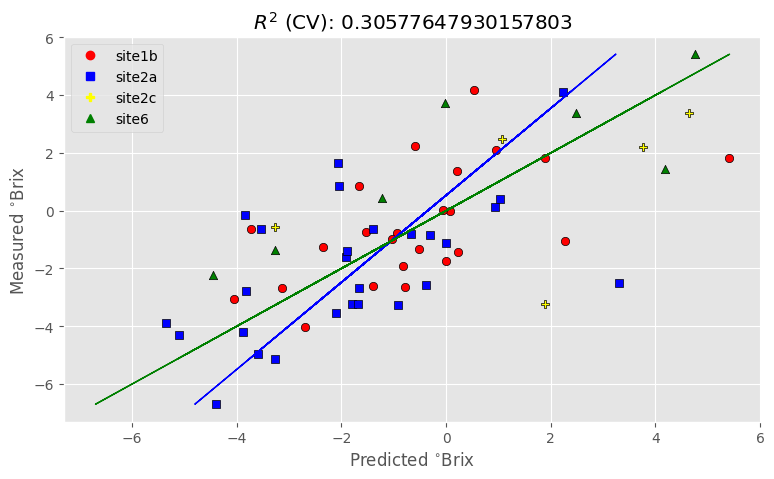

In [51]:
opt_Xc_D15N, ncomp_D15N, wav_D15N, sorted_ind_D15N = pls_variable_selection(x_new_traits, y_weighted_d15n, 20)
file_name = 'F:/wenqu/result/d15n.csv'
simple_pls_cv(opt_Xc_D15N, y_weighted_d15n, ncomp_D15N, labels_pc, file_name)

In [52]:
mean = np.mean(opt_Xc_D15N, axis=0)
std_dev = np.std(opt_Xc_D15N, axis=0)

# Manually scale the data
opt_Xc_D15N_scaled = (opt_Xc_D15N - mean) / std_dev

In [53]:
optimal_pls_D15N  = PLSRegression(n_components=14, scale=False)
optimal_pls_D15N.fit(opt_Xc_D15N_scaled, y_weighted_d15n)

coefficients = optimal_pls_D15N.coef_[:,0]
bands = band_name[sorted_ind_D15N][wav_D15N:]

print(coefficients.shape, bands.shape)

(33,) (33,)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [54]:
# Compute the intercept using means of X and y
x_mean = opt_Xc_D15N_scaled.mean(axis=0)
y_mean = y_weighted_d15n.mean()

intercept_d15n = y_mean - np.dot(x_mean, coefficients)

linear_equation = "d15n_trait = "

for coef, predictor in zip(coefficients, bands):
    linear_equation += "{:.6f}*data_dict['{}'] + ".format(coef, predictor)

# Adding the intercept to the end
linear_equation += "{:.6f}".format(intercept_d15n)

print(linear_equation)

d15n_trait = -1.568919*data_dict['b113_mean'] + -2.753267*data_dict['b5_mean'] + 0.814920*data_dict['b59_std'] + 0.649395*data_dict['b35_std'] + -2.245137*data_dict['b115_mean'] + 3.714194*data_dict['b38_std'] + -1.836649*data_dict['b62_std'] + 1.019347*data_dict['b26_mean'] + -0.250738*data_dict['b13_std'] + -1.189784*data_dict['b25_std'] + 0.225384*data_dict['b115_std'] + -0.399855*data_dict['b111_mean'] + -4.728619*data_dict['b91_std'] + -3.629117*data_dict['b14_mean'] + -3.006711*data_dict['b23_std'] + 2.248574*data_dict['b14_std'] + 2.619633*data_dict['b107_mean'] + -3.355104*data_dict['b122_mean'] + -3.410062*data_dict['b18_std'] + 5.774426*data_dict['b101_std'] + 3.915391*data_dict['b98_std'] + 3.588849*data_dict['b11_std'] + 0.647702*data_dict['b7_mean'] + -1.227472*data_dict['b3_mean'] + 2.216845*data_dict['b9_std'] + 3.183019*data_dict['b109_std'] + 3.923715*data_dict['b8_mean'] + -3.130635*data_dict['b15_std'] + -5.874215*data_dict['b99_std'] + -3.324963*data_dict['b113_std'

In [55]:
bands

array(['b113_mean', 'b5_mean', 'b59_std', 'b35_std', 'b115_mean',
       'b38_std', 'b62_std', 'b26_mean', 'b13_std', 'b25_std', 'b115_std',
       'b111_mean', 'b91_std', 'b14_mean', 'b23_std', 'b14_std',
       'b107_mean', 'b122_mean', 'b18_std', 'b101_std', 'b98_std',
       'b11_std', 'b7_mean', 'b3_mean', 'b9_std', 'b109_std', 'b8_mean',
       'b15_std', 'b99_std', 'b113_std', 'b108_mean', 'b120_std',
       'b118_std'], dtype='<U9')

In [56]:
coefficients

array([-1.56891932, -2.75326703,  0.81491953,  0.6493951 , -2.24513688,
        3.71419441, -1.83664937,  1.01934743, -0.25073849, -1.18978426,
        0.22538381, -0.39985504, -4.72861929, -3.62911703, -3.00671116,
        2.24857414,  2.61963286, -3.35510382, -3.41006209,  5.77442559,
        3.91539086,  3.58884868,  0.64770173, -1.22747164,  2.21684509,
        3.1830188 ,  3.92371468, -3.13063549, -5.87421544, -3.32496306,
        5.01681857,  5.34387411, -5.00039739])

In [57]:
intercept_d15n

-0.8307368537999948

# LA

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


3% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  25
Wavelengths to be keeped  79
Optimised MSEP  0.47958646147822354

[[ 2.0717648 ]
 [ 0.68769345]
 [ 0.47670342]
 [ 0.34394897]
 [ 1.03047301]
 [ 3.41910562]
 [ 1.43639828]
 [ 1.44856184]
 [ 1.18951879]
 [ 0.58403769]
 [ 1.63281911]
 [ 0.8698578 ]
 [ 0.89334301]
 [ 0.96559361]
 [ 0.94963498]
 [ 0.87786138]
 [ 0.74216408]
 [ 1.32099217]
 [ 0.62369313]
 [ 0.6596985 ]
 [ 2.39768562]
 [-0.88546704]
 [ 1.49259956]
 [ 1.3007931 ]
 [-0.63948058]
 [ 1.45915372]
 [ 2.74877938]
 [ 2.91767388]
 [ 3.10308264]
 [ 2.49110167]
 [ 2.73549212]
 [ 2.96996567]
 [ 3.00967452]
 [ 3.19184894]
 [ 2.38086478]
 [ 2.17007812]
 [ 2.59475428]
 [ 1.39108321]
 [ 4.01786028]
 [ 2.42489992]
 [ 2.58424433]
 [ 2.31886546]
 [ 1.92899864]
 [ 2.72788829]
 [ 2.71098117]
 [ 4.00711232]
 [ 2.43308549]
 [ 4.31512037]
 [ 3.10961263]
 [ 3.44336304]
 [ 2.1722747 ]
 [ 3.29128539]
 [ 2.78690874]
 [ 2.5424642 ]
 [ 3.33905707]
 [ 3.1981735 ]
 [ 1.62312028]
 [-0.88848445]
 [ 3.4848

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


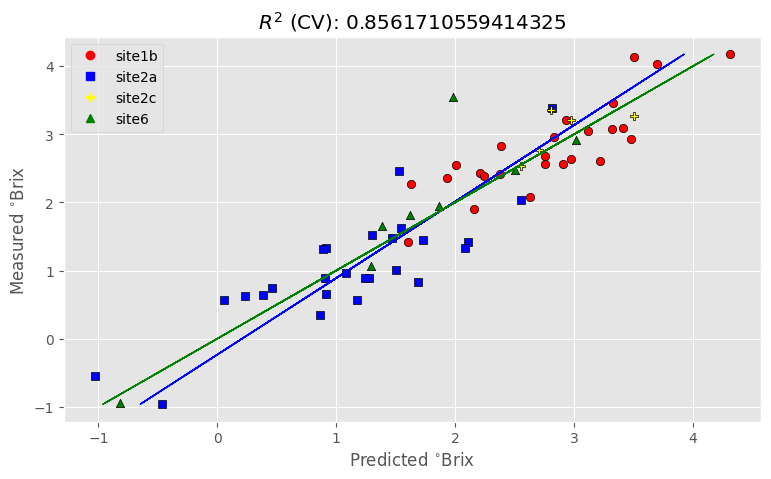

In [58]:
opt_Xc_la, ncomp_la, wav_la, sorted_ind_la = pls_variable_selection(x_la, log_y_weighted_la, 30)
file_name = 'F:/wenqu/result/la.csv'
simple_pls_cv(opt_Xc_la, log_y_weighted_la, ncomp_la, labels_la, file_name)

In [59]:
mean = np.mean(opt_Xc_la, axis=0)
std_dev = np.std(opt_Xc_la, axis=0)

# Manually scale the data
opt_Xc_la_scaled = (opt_Xc_la - mean) / std_dev

In [60]:
optimal_pls_la  = PLSRegression(n_components=25, scale=False)
optimal_pls_la.fit(opt_Xc_la_scaled, log_y_weighted_la)

coefficients = optimal_pls_la.coef_[:,0]
bands = band_name[sorted_ind_la][wav_la:]
print(coefficients.shape, bands.shape)


(79,) (79,)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [61]:
# Compute the intercept using means of X and y
x_mean = opt_Xc_la_scaled.mean(axis=0)
y_mean = log_y_weighted_la.mean()

intercept_la = y_mean - np.dot(x_mean, coefficients)

linear_equation = "la_trait = "

for coef, predictor in zip(coefficients, bands):
    linear_equation += "{:.6f}*data_dict['{}'] + ".format(coef, predictor)

# Adding the intercept to the end
linear_equation += "{:.6f}".format(intercept_la)

print(linear_equation)

la_trait = -0.405277*data_dict['b61_std'] + 0.310913*data_dict['b11_mean'] + -0.415243*data_dict['b4_std'] + 1.350251*data_dict['b39_std'] + -0.275731*data_dict['b51_mean'] + 0.848288*data_dict['b93_std'] + -0.628293*data_dict['b44_std'] + 1.034305*data_dict['b42_mean'] + 0.095751*data_dict['b36_std'] + 0.202600*data_dict['b38_mean'] + -0.432100*data_dict['b35_std'] + -0.648819*data_dict['b47_std'] + 0.737650*data_dict['b119_mean'] + -0.320103*data_dict['b98_std'] + -0.520222*data_dict['b76_std'] + -0.020973*data_dict['b120_mean'] + 0.748107*data_dict['b86_std'] + -1.068240*data_dict['b71_std'] + -0.419827*data_dict['b91_std'] + 0.936568*data_dict['b64_std'] + 0.960911*data_dict['b19_std'] + 0.650576*data_dict['b1_std'] + -0.415216*data_dict['b100_std'] + -0.351960*data_dict['b121_std'] + 0.640122*data_dict['b63_std'] + 1.062211*data_dict['b13_std'] + 0.580185*data_dict['b20_mean'] + -0.531694*data_dict['b17_std'] + -0.592665*data_dict['b112_std'] + 0.463747*data_dict['b7_mean'] + -0.6

In [62]:
bands

array(['b61_std', 'b11_mean', 'b4_std', 'b39_std', 'b51_mean', 'b93_std',
       'b44_std', 'b42_mean', 'b36_std', 'b38_mean', 'b35_std', 'b47_std',
       'b119_mean', 'b98_std', 'b76_std', 'b120_mean', 'b86_std',
       'b71_std', 'b91_std', 'b64_std', 'b19_std', 'b1_std', 'b100_std',
       'b121_std', 'b63_std', 'b13_std', 'b20_mean', 'b17_std',
       'b112_std', 'b7_mean', 'b60_std', 'b60_mean', 'b64_mean',
       'b113_std', 'b24_std', 'b13_mean', 'b37_std', 'b116_mean',
       'b105_std', 'b89_std', 'b15_mean', 'b57_mean', 'b23_std',
       'b101_mean', 'b75_mean', 'b83_std', 'b57_std', 'b41_std',
       'b12_mean', 'b42_std', 'b66_std', 'b6_std', 'b108_std',
       'b112_mean', 'b109_mean', 'b1_mean', 'b116_std', 'b34_std',
       'b110_mean', 'b27_std', 'b32_std', 'b10_std', 'b65_std',
       'b107_std', 'b113_mean', 'b29_std', 'b108_mean', 'b4_mean',
       'b56_std', 'b11_std', 'b5_mean', 'b122_std', 'b7_std', 'b52_std',
       'b2_mean', 'b12_std', 'b8_std', 'b103_std', 'b

In [63]:
coefficients

array([-0.40527728,  0.31091288, -0.41524266,  1.35025089, -0.27573119,
        0.84828842, -0.62829318,  1.03430498,  0.09575056,  0.20259978,
       -0.43209954, -0.64881923,  0.73765016, -0.32010253, -0.52022179,
       -0.02097299,  0.74810653, -1.06824039, -0.41982688,  0.9365678 ,
        0.96091103,  0.65057583, -0.41521624, -0.35196026,  0.640122  ,
        1.06221072,  0.58018498, -0.5316935 , -0.59266481,  0.46374678,
       -0.60896831, -1.07023908,  0.43118059,  0.39085222, -0.17783331,
       -0.51250023,  0.73238604,  0.13299784, -0.92908781,  0.75717733,
       -0.90966513,  0.19814165,  0.75373044,  1.90956942, -1.83616852,
        0.68828334,  1.28884506, -0.49915995, -0.81411224, -0.86511924,
        0.45087146,  0.48142469,  0.72136406, -0.73558093, -1.3964652 ,
       -0.71661635, -1.19673739, -0.9389232 , -0.41550776,  1.35638796,
       -1.58455116,  0.87388201,  1.12327087,  0.89511958,  0.87461951,
        0.63830627,  0.99275483,  1.18604534, -0.98219703, -0.88

In [64]:
intercept_la

1.982469884629638

# LDMC

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  21
Wavelengths to be keeped  35
Optimised MSEP  0.24565824179102108

[[-0.48663206]
 [-0.63556296]
 [-0.31997759]
 [-0.61522173]
 [-0.44016837]
 [-0.43011411]
 [-0.26729231]
 [-0.49470684]
 [-0.71609754]
 [-0.48145304]
 [ 0.28936067]
 [ 0.29814708]
 [ 0.15700898]
 [-0.52490089]
 [-0.82116708]
 [ 0.05156286]
 [-0.50116151]
 [-0.69808743]
 [-1.36877746]
 [ 0.18730614]
 [-0.54099758]
 [-0.49025172]
 [-0.69935132]
 [-1.04181791]
 [-1.00683383]
 [-0.85509639]
 [-0.71310124]
 [-0.98205267]
 [-1.00702323]
 [-1.07968491]
 [-0.90649303]
 [-0.58988926]
 [-0.78359037]
 [-0.70913718]
 [-0.84134899]
 [-1.06152642]
 [-0.85932457]
 [-0.7649929 ]
 [-0.66323537]
 [-0.80190308]
 [-1.06110702]
 [-0.99231408]
 [-0.94856944]
 [-0.96115306]
 [-1.00802795]
 [-1.02061133]
 [-1.20198604]
 [-0.7082155 ]
 [-0.17468889]
 [-0.38280037]
 [ 0.01815207]
 [ 0.0213684 ]
 [-0.42580496]
 [-0.31697817]
 [ 0.27149189]
 [-0.74890918]
 [-0.99073598]
 [-0.91246446]
 [-0.6493

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


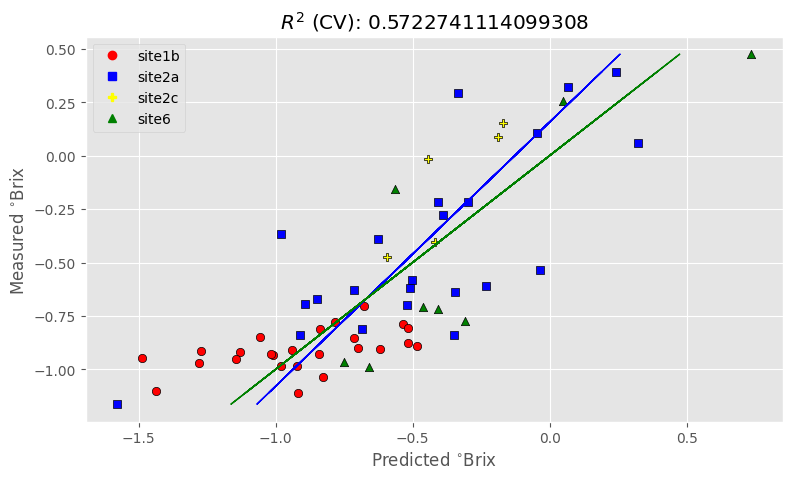

In [65]:
opt_Xc_ldmc, ncomp_ldmc, wav_ldmc, sorted_ind_ldmc = pls_variable_selection(x_ldmc, log_y_weighted_LDMC, 25)
file_name = 'F:/wenqu/result/ldmc.csv'
simple_pls_cv(opt_Xc_ldmc, log_y_weighted_LDMC, ncomp_ldmc, labels_ldmc,file_name)

In [66]:
mean = np.mean(opt_Xc_ldmc, axis=0)
std_dev = np.std(opt_Xc_ldmc, axis=0)

# Manually scale the data
opt_Xc_ldmc_scaled = (opt_Xc_ldmc - mean) / std_dev

In [67]:
optimal_pls_ldmc  = PLSRegression(n_components=21, scale=False)
optimal_pls_ldmc.fit(opt_Xc_ldmc_scaled, log_y_weighted_LDMC)

coefficients_ldmc = optimal_pls_ldmc.coef_[:,0]

bands_ldmc = band_name[sorted_ind_ldmc][wav_ldmc:]
print(coefficients_ldmc.shape, bands_ldmc.shape)

(35,) (35,)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [68]:
# Compute the intercept using means of X and y
x_mean = opt_Xc_ldmc_scaled.mean(axis=0)
y_mean = log_y_weighted_LDMC.mean()

intercept_ldmc = y_mean - np.dot(x_mean, coefficients_ldmc)

linear_equation = "ldmc_trait = "

for coef, predictor in zip(coefficients_ldmc, bands_ldmc):
    linear_equation += "{:.6f}*data_dict['{}'] + ".format(coef, predictor)

# Adding the intercept to the end
linear_equation += "{:.6f}".format(intercept_ldmc)

print(linear_equation)

ldmc_trait = -0.194076*data_dict['b10_std'] + 0.137075*data_dict['b2_std'] + 1.115662*data_dict['b25_std'] + -0.356942*data_dict['b117_mean'] + 0.109774*data_dict['b8_mean'] + 0.081854*data_dict['b3_mean'] + 0.812357*data_dict['b41_std'] + 0.802910*data_dict['b112_mean'] + 0.509162*data_dict['b21_mean'] + 1.979820*data_dict['b51_std'] + -1.138638*data_dict['b104_mean'] + -0.698593*data_dict['b17_mean'] + -0.105811*data_dict['b23_std'] + -0.276556*data_dict['b16_mean'] + -0.597460*data_dict['b11_std'] + -0.980204*data_dict['b111_mean'] + 0.045297*data_dict['b4_mean'] + 0.000225*data_dict['b106_std'] + -1.041255*data_dict['b22_std'] + 1.616488*data_dict['b118_mean'] + 0.014352*data_dict['b33_std'] + -0.301427*data_dict['b7_mean'] + -1.247015*data_dict['b100_std'] + -0.611479*data_dict['b117_std'] + -2.485582*data_dict['b49_std'] + -0.296205*data_dict['b118_std'] + -0.192213*data_dict['b10_mean'] + 0.057229*data_dict['b122_mean'] + 0.697008*data_dict['b19_mean'] + 1.665074*data_dict['b103

In [69]:
bands_ldmc

array(['b10_std', 'b2_std', 'b25_std', 'b117_mean', 'b8_mean', 'b3_mean',
       'b41_std', 'b112_mean', 'b21_mean', 'b51_std', 'b104_mean',
       'b17_mean', 'b23_std', 'b16_mean', 'b11_std', 'b111_mean',
       'b4_mean', 'b106_std', 'b22_std', 'b118_mean', 'b33_std',
       'b7_mean', 'b100_std', 'b117_std', 'b49_std', 'b118_std',
       'b10_mean', 'b122_mean', 'b19_mean', 'b103_std', 'b104_std',
       'b29_std', 'b114_std', 'b107_std', 'b12_std'], dtype='<U9')

In [70]:
coefficients_ldmc

array([-1.94075931e-01,  1.37075388e-01,  1.11566218e+00, -3.56942380e-01,
        1.09774142e-01,  8.18542691e-02,  8.12357146e-01,  8.02909567e-01,
        5.09161737e-01,  1.97981981e+00, -1.13863771e+00, -6.98592661e-01,
       -1.05810936e-01, -2.76556088e-01, -5.97460499e-01, -9.80203700e-01,
        4.52970081e-02,  2.25316480e-04, -1.04125513e+00,  1.61648798e+00,
        1.43515019e-02, -3.01426981e-01, -1.24701511e+00, -6.11478818e-01,
       -2.48558197e+00, -2.96204800e-01, -1.92213147e-01,  5.72291594e-02,
        6.97007901e-01,  1.66507377e+00,  1.56269922e-01, -7.94264925e-01,
       -5.65259545e-01,  1.04082161e+00,  1.13762075e+00])

In [71]:
intercept_ldmc

-0.600681088370801